## 导入包

In [64]:
import numpy as np
import pandas as pd
import geopandas as gpd
import netCDF4 as nc

from tqdm import tqdm
from netCDF4 import num2date

import matplotlib.pyplot as plt

## 加载NC文件

In [65]:
nc_data = nc.Dataset("lftx.sfc.2021.nc")

In [66]:
time_units = [temp_variable.units for temp_variable in nc_data.variables.values() if temp_variable.name == 'time'][0]
# [pd.to_datetime(str(num2date(temp_time,units=time_units))) for temp_time in np.array(nc_data.variables['time'])]
time_list = [num2date(temp_time, units=time_units).strftime('%Y-%m-%d') for temp_time in
             np.array(nc_data.variables['time'])]


In [67]:
lftx_data = np.array(nc_data.variables['lftx'])
lftx_data = lftx_data[np.where([i == '2021-02-13' for i in time_list])[0][0], :, :]

lon_data = np.array(nc_data.variables['lon'])
lat_data = np.array(nc_data.variables['lat'])

## 读取json数据

In [68]:
chinamap_data = gpd.read_file(filename="100000_中华人民共和国_full.json")
chinamap_data.head()

,adcode,name,childrenNum,level,parent,subFeatureIndex,adchar,geometry
0,110000,北京市,16.0,province,{'adcode': 100000},0.0,None,"MULTIPOLYGON (((117.34861 40.58114, 117.38988 ..."
1,120000,天津市,16.0,province,{'adcode': 100000},1.0,None,"MULTIPOLYGON (((117.76560 39.40053, 117.84691 ..."
2,130000,河北省,11.0,province,{'adcode': 100000},2.0,None,"MULTIPOLYGON (((117.46749 40.64974, 117.41267 ..."
3,140000,山西省,11.0,province,{'adcode': 100000},3.0,None,"MULTIPOLYGON (((110.37926 34.60061, 110.42484 ..."
4,150000,内蒙古自治区,12.0,province,{'adcode': 100000},4.0,None,"POLYGON ((97.17290 42.79526, 97.37123 42.45708..."


In [103]:
%matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
chinamap_data.iloc[:35,:].plot(ax=ax, color='black')
plt.show()

Using matplotlib backend: Qt5Agg


In [74]:
from shapely.geometry import Point

chinamap_data.loc[chinamap_data['name'] == '北京市', 'geometry'].contains(Point(20, 40))

0    False
dtype: bool

In [75]:
chinamap_data.loc[:, 'geometry'].contains(Point(20, 40))



0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

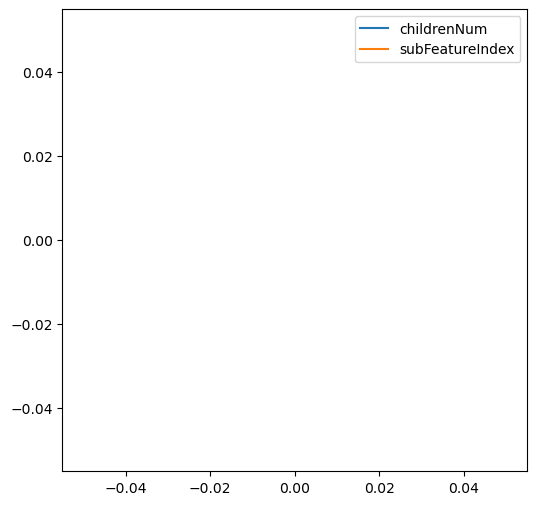